# TMBD Dataset Content Recommender System

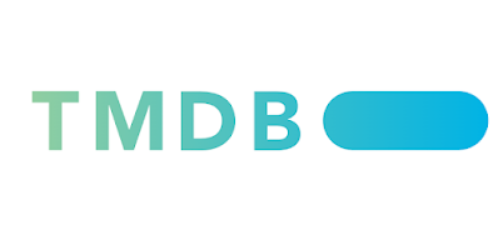

### Project Overview:

The Movie Recommender System is a data-driven application designed to help users discover movies that align with their preferences and interests. Built using the extensive TMDB dataset, this recommender system utilizes powerful machine learning algorithms to provide personalized movie recommendations to users.

In [ ]:
# importing google drive:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing basic libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading datasets:

credits = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/TMDB Dataset Content Based Recommender System/archive (2)/tmdb_5000_credits.csv")
movies = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/TMDB Dataset Content Based Recommender System/archive (2)/tmdb_5000_movies.csv")

In [ ]:
# Datasets' first views:

credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# Merging the datasets:

movies = movies.merge(credits, on='title')

In [ ]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


#### Keeping only below features which are going to be useful for our goal:

genres

id

keywords

title

overview

cast

crew

In [ ]:
# Creating new dataframe with only required features:

movies = movies[['movie_id', "title", 'overview', 'genres','keywords', 'cast', 'crew']]

## Feature Engineering

In [ ]:
# Checking null values counts:

movies.isna().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [ ]:
# Removing rows with null values in overview feature as these are less then 1% of the total observations:

movies.dropna(inplace=True)

In [ ]:
# Again checking null value count:

movies.isna().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [ ]:
# Checking duplicate values in the dataset:

movies.duplicated().sum()

0

In [ ]:
# Creating a function to extract all the genres for each movie:

def extract_genres(string):

  new = []

  for item in eval(string):
    new.append(item['name'])

  return new

In [ ]:
# Applying the function on the dataset:

movies.genres = movies.genres.apply(extract_genres)

In [ ]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [ ]:
# Applying the same function on keywords feature to extract all the names of keywords:

movies.keywords = movies.keywords.apply(extract_genres)

In [ ]:
# Creating a function to extract names of first 3 actors/actress of the movie:

def extract_actor(string):

  new = []

  for item in range(0, 3):
    if item<len(eval(string)): # To check that the index is always less than the total number of elements inside the list
      new.append(eval(string)[item]['name'])
    else:
      break
  return new

In [ ]:
# Applying the function on the cast feature:

movies.cast = movies.cast.apply(extract_actor)

In [ ]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [ ]:
# Creating a function to extract director names from a movie:

def extract_director(string):

  directors = []

  for item in eval(string):
      if item['job']=='director' or item['job']=='Director':
          directors.append(item['name'])

  return directors

In [ ]:
# Applying the function and creating new column for directors:

movies['director'] = movies.crew.apply(extract_director)

In [ ]:
# Removing crew feature as it is not required now:

movies.drop('crew',axis=1,inplace=True)

In [ ]:
# Converting the strings of overview features into list of words:

movies.overview = movies.overview.apply(lambda x: x.split())

In [ ]:
# Creating a function to remove the space between the list values of features:

def remove_space(list1):

  empty = []

  for item in list1:
    empty.append(item.replace(" ", ""))

  return empty

In [ ]:
# applying the function on the featuers:

movies.overview = movies.overview.apply(remove_space)
movies.genres = movies.genres.apply(remove_space)
movies.keywords = movies.keywords.apply(remove_space)
movies.cast = movies.cast.apply(remove_space)

In [ ]:
# Removing the space from director feature values seperately:

movies["director"] = movies["director"].apply(lambda x: [word.replace(" ","") for word in x])

In [ ]:
# Concatinating all the text features and creating a new columns called 'tags':

movies["tags"] = movies["overview"] + movies["genres"] + movies["keywords"] + movies['cast'] + movies["director"]

In [ ]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,director,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [ ]:
# Creating a new dataframe with only movie_id, title and tags feature:

df = movies[['movie_id', 'title','tags']]

In [ ]:
df.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [ ]:
# Converting the tags list into strings:

df['tags'] = df['tags'].apply(lambda x: " ".join(x))

<ipython-input-37-decd4284785c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(lambda x: " ".join(x))


In [ ]:
df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


## Natural Language Processing

In [ ]:
# converting the text into lower case:

df['tags'] = df['tags'].str.lower()

<ipython-input-39-304fd7076351>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].str.lower()


In [ ]:
df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Creating a function to remove the stopwords:

def remove_stopwords(string):
    # Split the string into words using whitespace as the delimiter
    words = string.split()

    # Remove stopwords and non-alphabetic characters
    stop_words = set(stopwords.words('english'))
    cleaned_words = [word for word in words if word.isalpha() and word not in stop_words]

    # Join the cleaned words back into a string
    cleaned_string = ' '.join(cleaned_words)

    return cleaned_string

In [ ]:
# applying the function on the dataset:

df['tags'] = df['tags'].apply(remove_stopwords)

<ipython-input-43-d3663f73fb6d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(remove_stopwords)


In [ ]:
df.head()

,movie_id,title,tags
0,19995,Avatar,paraplegic marine dispatched moon pandora uniq...
1,285,Pirates of the Caribbean: At World's End,captain long believed come back life headed ed...
2,206647,Spectre,cryptic message past sends trail uncover sinis...
3,49026,The Dark Knight Rises,following death district attorney harvey batma...
4,49529,John Carter,john carter former military captain inexplicab...


In [ ]:
# Creating a function to apply stemming:

from nltk.stem.porter import PorterStemmer

def stemming(string):

  ps = PorterStemmer()

  words = string.split(" ")

  words = [ps.stem(word) for word in words]

  return " ".join(words)

In [ ]:
# Applying the function on the dataset:

df['tags'] = df['tags'].apply(stemming)

<ipython-input-46-23ada4725611>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(stemming)


In [ ]:
df.head()

,movie_id,title,tags
0,19995,Avatar,parapleg marin dispatch moon pandora uniqu bec...
1,285,Pirates of the Caribbean: At World's End,captain long believ come back life head edg ea...
2,206647,Spectre,cryptic messag past send trail uncov sinist ba...
3,49026,The Dark Knight Rises,follow death district attorney harvey batman a...
4,49529,John Carter,john carter former militari captain inexplic t...


In [ ]:
# Applying vectorization using TF-IDF technique:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

vectors = tfidf.fit_transform(df['tags']).toarray()

In [ ]:
# Viewing the matrix:

vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Creating a metrics for cosine similarities of all the movies' vectors:

from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(vectors)

In [ ]:
# Checking the shape of the similarity scores' matrix

similarity.shape

(4806, 4806)

In [ ]:
# Retreving index position of a random movie in the dataset:

df[df['title']=='Man of Steel'].index[0]

14

## Build Recommender System

In [ ]:
# Creating a function which can recommend 5 similary type of contents:

def recommend(name):

  index = df[df['title']==name].index[0]
  distances = similarity[index]
  movies_list = sorted(list(enumerate(similarity[index])),reverse=True, key = lambda x:x[1])[1:6]

  for item in movies_list:
    print(df.iloc[item[0]]['title'])

In [ ]:
# Testing the function on a random movie name:

recommend('Batman Begins')

The Dark Knight
Batman v Superman: Dawn of Justice
The Dark Knight Rises
Batman
Batman


## Saving the files for Deployement

In [ ]:
# Importing pickle and saving the movies data:

import pickle

pickle.dump(df, open('movies.pkl', 'wb'))

In [ ]:
# Saving the similarity matrix in pickle file:

pickle.dump(similarity, open('similarity.pkl', 'wb'))

### While Jupyter Notebook is a fantastic tool for data exploration and model development, it doesn't have the built-in capability to deploy models on a local server. To proceed with model deployment on a local server, switching to PyCharm and provided the code snippets below:

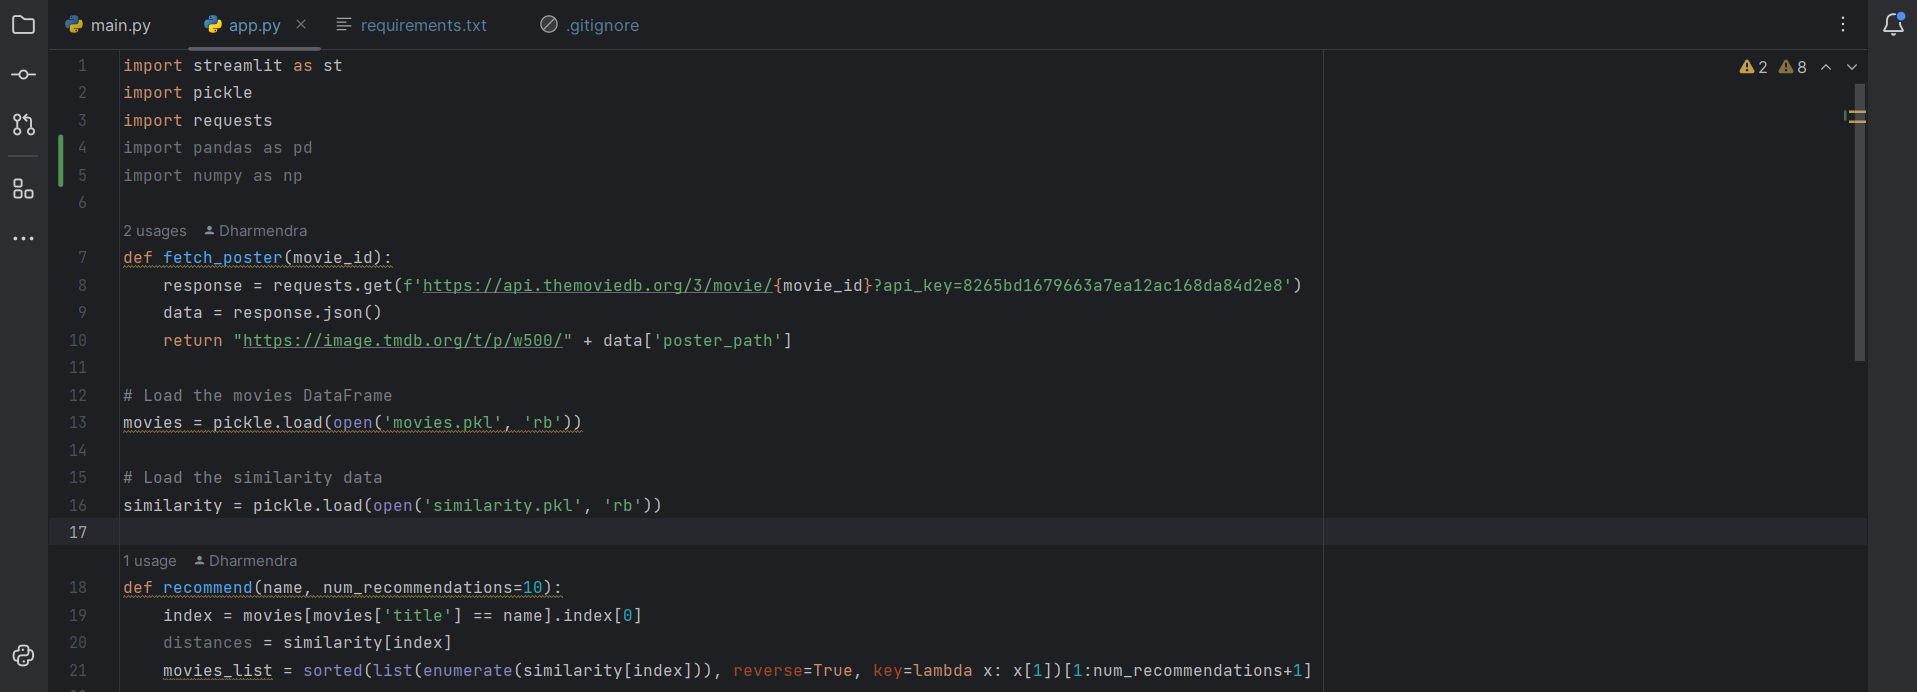

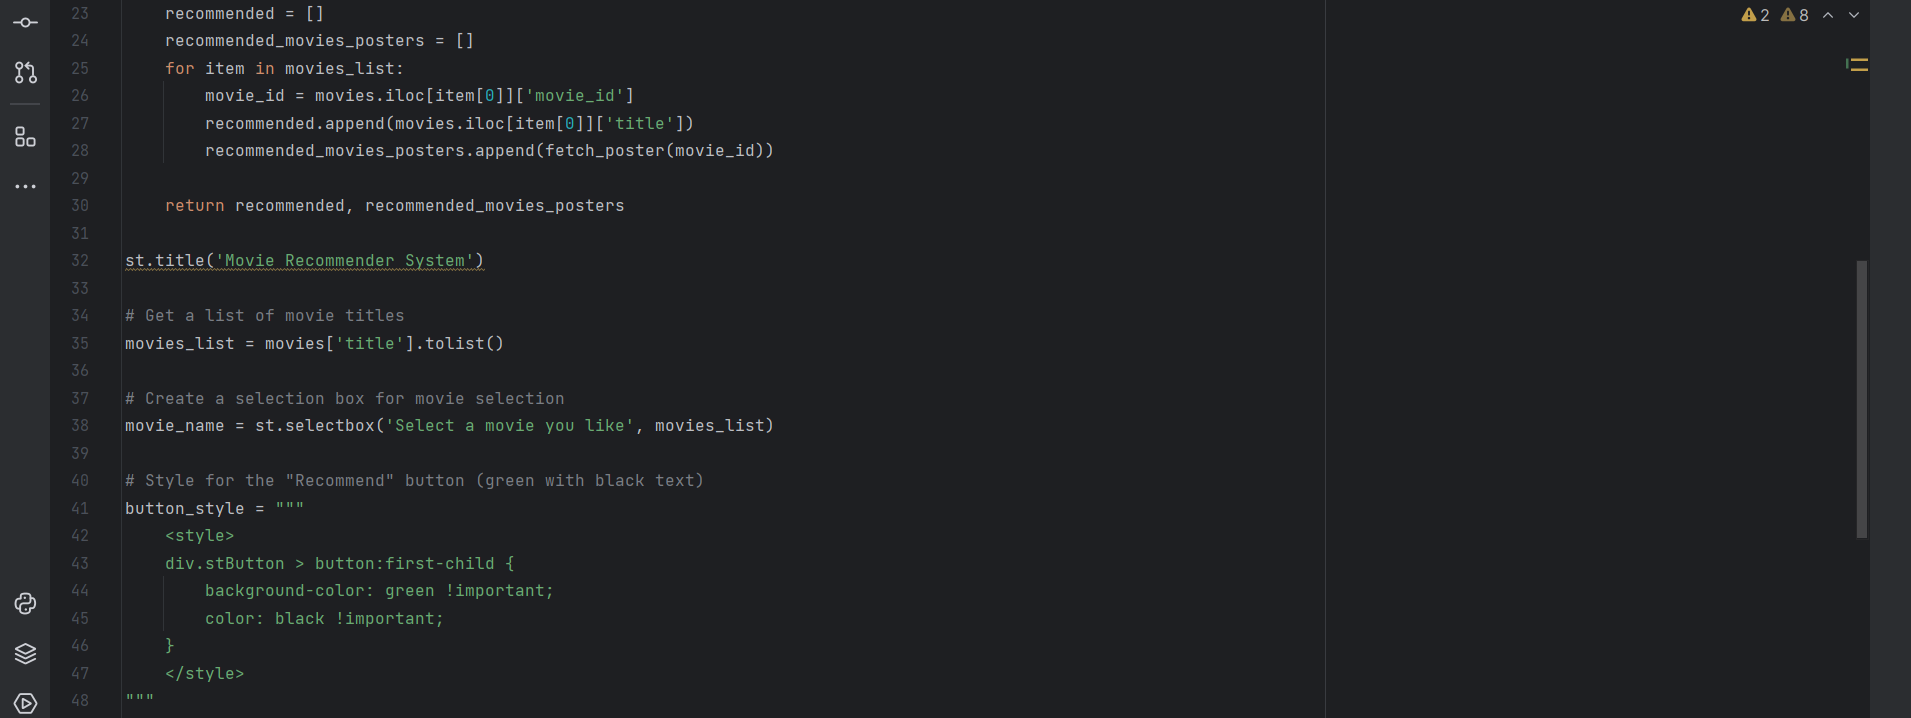

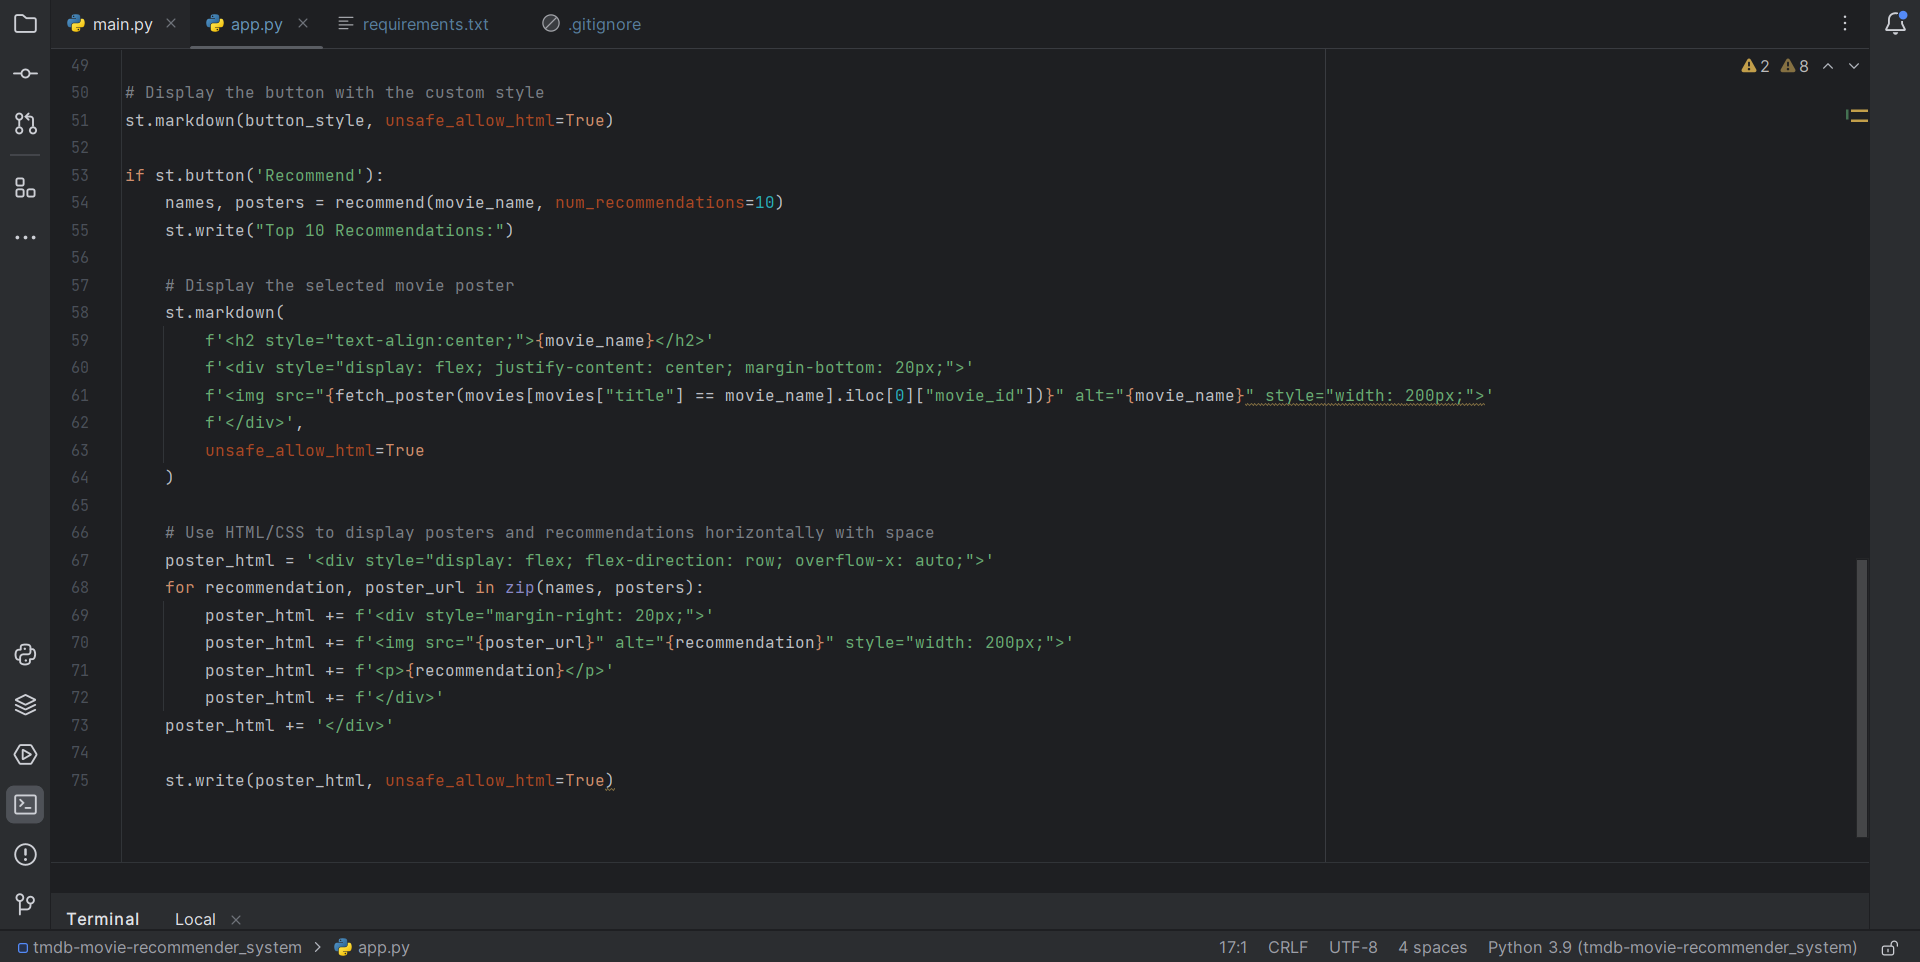

### To see this movie recommender system in action, please go on the link below:

https://tmdb-content-based-movie-recommender-system-dharmendra.streamlit.app/